In [401]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout #needed for optimization in the sequential layer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [402]:
data = pd.read_csv('D:\ML\SeoulBikeData.csv', delimiter = ',', encoding = 'latin1')

In [403]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [404]:
data.shape

(8760, 14)

### Preprocessing

In [405]:


data = data[ data['Rented Bike Count'] != 0 ]


Data contains 295 values that accomodates for non-functioning day. Removing those value from dataset as the count value is 0 and then dropping the Functioning Day Category

In [406]:
data = data.drop(columns="Functioning Day")
data.shape

(8465, 13)

In [407]:
data = data.drop_duplicates()

In [408]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')

In [409]:
#Description shows that the data is varied and needs to be normalized and scaled to avoid bias towards contributing factor

data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000


In [410]:
#Data contains no missing values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
dtype: int64

In [411]:
#data.fillna(data.mean(), inplace=True)

There are no missing values in the dataset. If the updated Seoul Bike Dataset would have new missing values, it can be dealth with the following methods.
1. Imputing
2. Removing Nan

In [412]:
data['Date'] = pd.to_datetime(data['Date'])

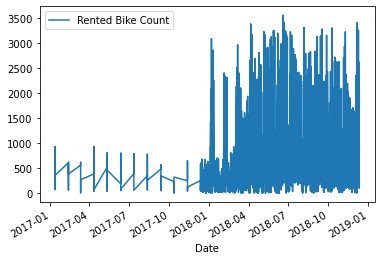

In [414]:
#Output can be seen as non-linear

data.plot(x='Date', y='Rented Bike Count')
plt.show()

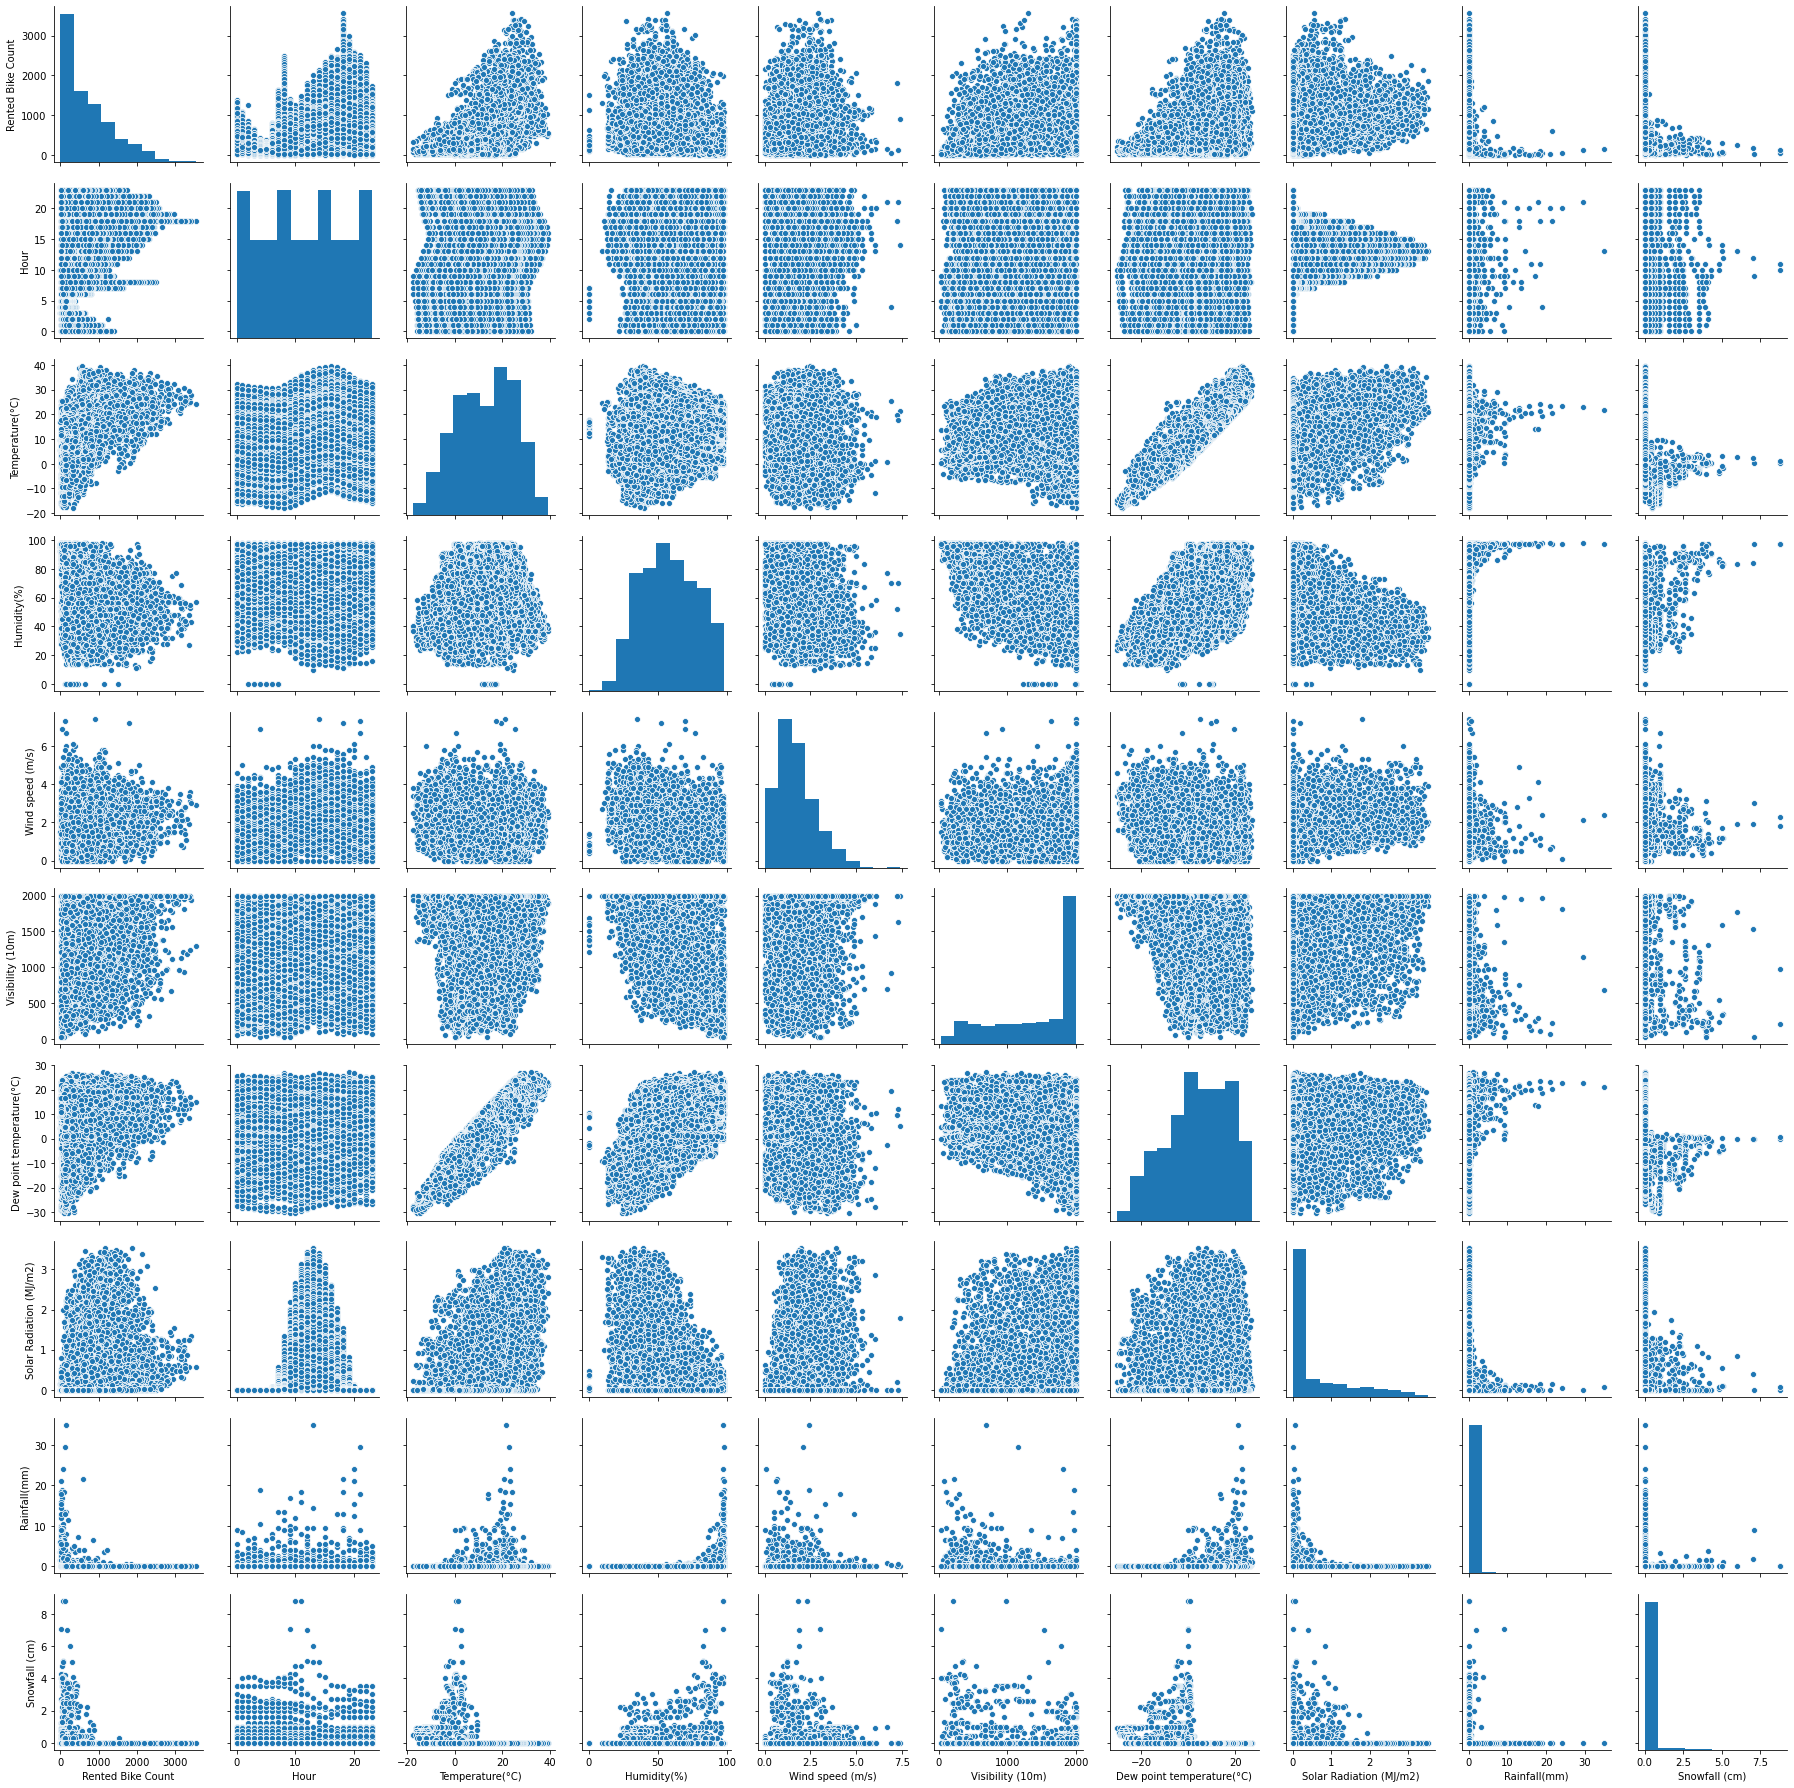

In [415]:
sns.pairplot(data)
plt.show()

In [310]:
#Need to categorize the date into month, year, and days
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = pd.DatetimeIndex(data['Date']).day
data['WeekDay'] = pd.DatetimeIndex(data['Date']).weekday


In [311]:
#Replacing the number with actual days for better understanding

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data['DayofWeek'] = data['WeekDay'].map(dayOfWeek)


In [312]:
del data['WeekDay']
del data['Date']

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   object 
 11  Holiday                    8465 non-null   object 
 12  Year                       8465 non-null   int64  
 13  Month                      8465 non-null   int64

In [314]:
#variables that need to be categorized - hour, seasons, Holiday, Year, Month, Day, Day of Week
column_list = ['Hour','Seasons', 'Holiday', 'Year', 'Month', 'Day','DayofWeek']

for column in column_list:
    data[column] = data[column].astype('category')

In [315]:
data.dtypes


Rented Bike Count               int64
Hour                         category
Temperature(°C)               float64
Humidity(%)                     int64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature(°C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                      category
Holiday                      category
Year                         category
Month                        category
Day                          category
DayofWeek                    category
dtype: object

### EDA and Outlier Elimination

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

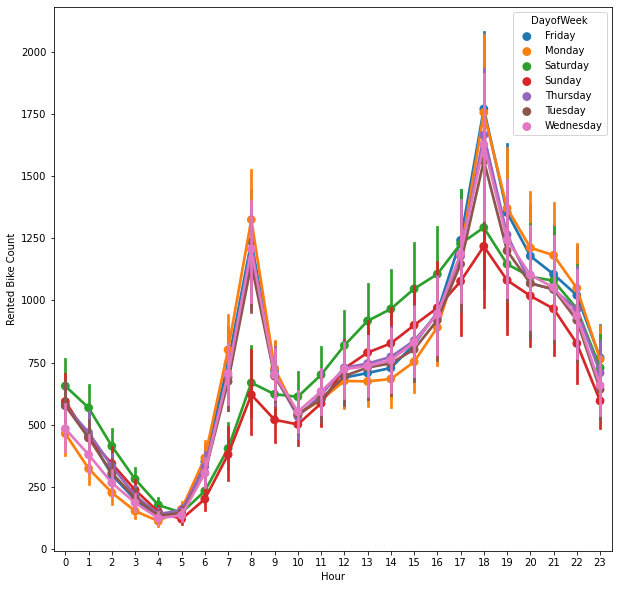

In [316]:

fig, ax = plt.subplots(figsize = (10,10))
sns.pointplot(data = data, x = 'Hour', y = 'Rented Bike Count', hue = 'DayofWeek')

Plots show that the users are highest on weekday during working hours. It might show that most bike users are students/working professionals who frequently use the bike during daytime to reach/leave a destination

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

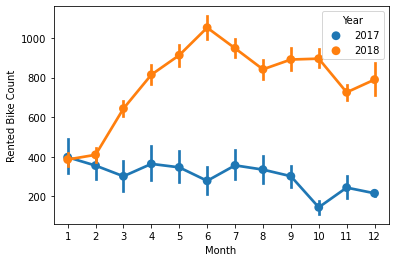

In [317]:
sns.pointplot(data = data, x = 'Month', y = 'Rented Bike Count', hue = 'Year')


The plot shows that the number of users have significantly increased from 2017 to 2018

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

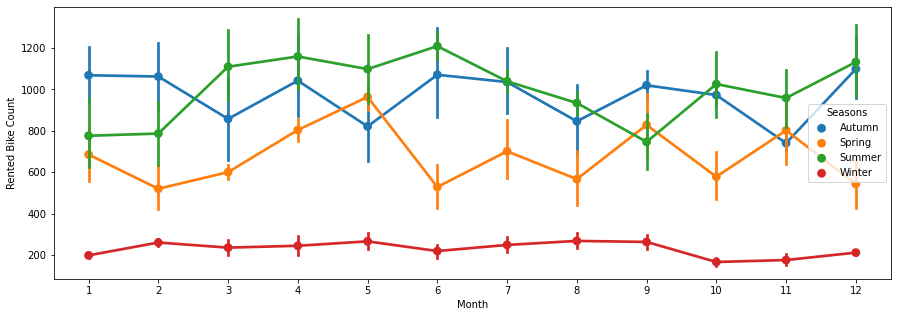

In [318]:
fig, ax = plt.subplots(figsize = (15,5))
sns.pointplot(data = data, x = 'Month', y = 'Rented Bike Count', hue = 'Seasons')


Weather plays a main factor which can be indicated by this plot. People are comfortable using bike during Autumn and Summer followed by Spring. Anyone hardly makes it through Winter accounding for less than 200 bikes overall at the location for a month.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

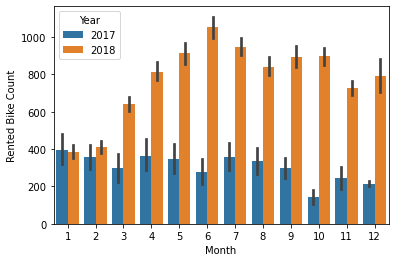

In [319]:
sns.barplot(data = data, x = 'Month', y = 'Rented Bike Count', hue = 'Year')


The barplot gives us an idea about hoe the number of cycles are divided throughout the years

<AxesSubplot:xlabel='DayofWeek', ylabel='Rented Bike Count'>

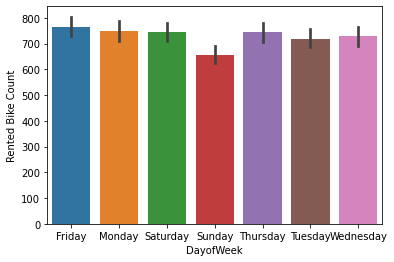

In [320]:
sns.barplot(data = data, x = 'DayofWeek', y = 'Rented Bike Count')


[Text(0.5, 1.0, 'Relation between Windy conditions and users')]

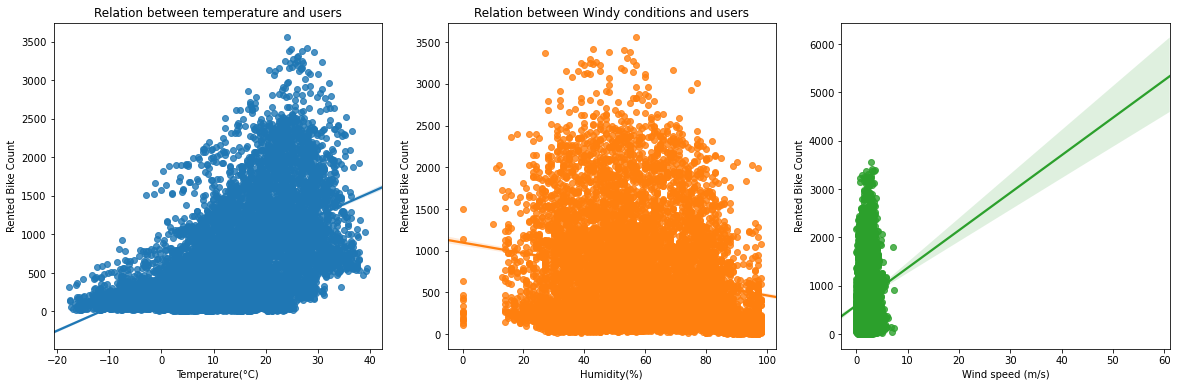

In [321]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=data['Temperature(°C)'], y=data['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=data['Humidity(%)'], y=data['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between humidity and users")
sns.regplot(x=data['Wind speed (m/s)'], y=data['Rented Bike Count'], ax=ax3)
ax2.set(title="Relation between Windy conditions and users")




<AxesSubplot:>

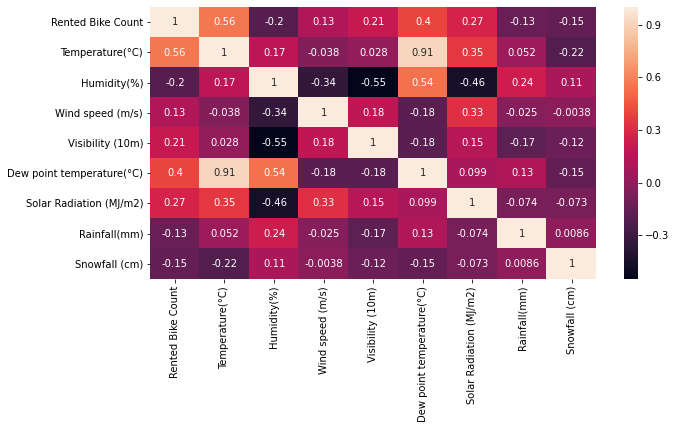

In [322]:
#only for numerical attributes and not categorical
corr = data.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='Temperature(°C)'>

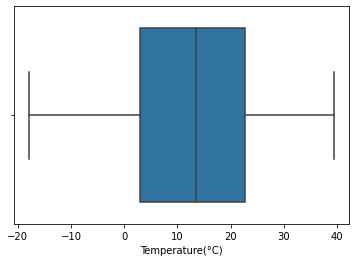

In [389]:
#numerical_factor = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
sns.boxplot(data['Temperature(°C)'])

<AxesSubplot:xlabel='Humidity(%)'>

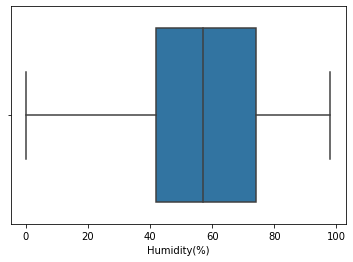

In [390]:
sns.boxplot(data['Humidity(%)'])

<AxesSubplot:xlabel='Wind speed (m/s)'>

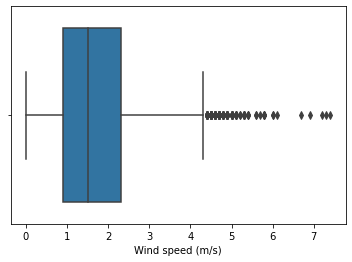

In [391]:
sns.boxplot(data['Wind speed (m/s)'])

<AxesSubplot:xlabel='Visibility (10m)'>

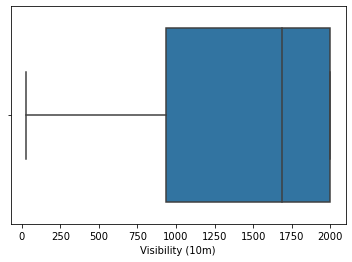

In [392]:
sns.boxplot(data['Visibility (10m)'])

<AxesSubplot:xlabel='Dew point temperature(°C)'>

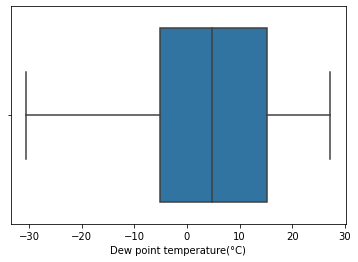

In [393]:
sns.boxplot(data['Dew point temperature(°C)'])

<AxesSubplot:xlabel='Rainfall(mm)'>

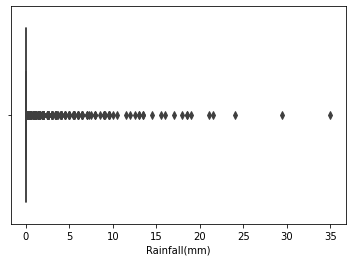

In [394]:
sns.boxplot(data['Rainfall(mm)'])

<AxesSubplot:xlabel='Snowfall (cm)'>

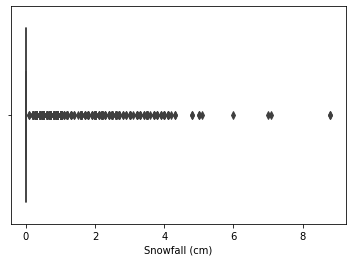

In [395]:
sns.boxplot(data['Snowfall (cm)'])

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

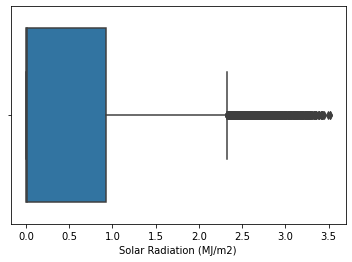

In [397]:
sns.boxplot(data['Solar Radiation (MJ/m2)'])

In [331]:
df_oh = data

def one_hot(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Hour','Seasons', 'Holiday', 'Year', 'Month', 'Day','DayofWeek']

for col in cols:
    df_oh = one_hot(df_oh, col)
df_oh.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Year_2017,Year_2018,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [332]:
#getting outliers and removing them

def percentile(data, column):
    median = data[column].median()
    q1 = data[column].quantile(0.25) # 25th percentile / 1st quartile
    q3 = data[column].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr 
    maximum = q3+1.5*iqr
    return median, q1, q3, iqr, minimum, maximum


def remove_outliers(data, column):
    median, q1, q3, iqr, minimum, maximum = percentile(data, column)
    data_out = data.loc[(data[column] > minimum) & (data[column] < maximum)]
    return data_out


In [333]:
temp = remove_outliers(df_oh, 'Temperature(°C)')

In [334]:
hum = remove_outliers(temp, 'Humidity(%)')

In [335]:
#Windspeed has outliers,  we'll now pass on the refined bike dataset that doesn't have windspeed outliers
win = remove_outliers(hum, 'Wind speed (m/s)')

In [336]:
win.shape

(8311, 91)

In [337]:
vis = remove_outliers(win, 'Visibility (10m)')

In [338]:
dew = remove_outliers(vis, 'Dew point temperature(°C)')

In [339]:
sol = remove_outliers(dew, 'Solar Radiation (MJ/m2)')

In [340]:
#Solar Radiation (MJ/m2) has outliers as well, passing on the refined dataset to check the other outliers
sol.shape

(7638, 91)

In [374]:
renewed_data = sol
data.dtypes

Rented Bike Count               int64
Hour                         category
Temperature(°C)               float64
Humidity(%)                     int64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature(°C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                      category
Holiday                      category
Year                         category
Month                        category
Day                          category
DayofWeek                    category
dtype: object

In [342]:
numerical_factors = ['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for iterables in numerical_factors:
    mean = renewed_data[iterables].mean()
    std = renewed_data[iterables].std()
    scaled_features[iterables] = [mean, std]
    renewed_data.loc[:, iterables] = (renewed_data[iterables] - mean)/std

In [343]:
renewed_data.shape

(7638, 91)

In [344]:
#SKLEARN
#pca = PCA().fit(renewed_data)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')

In [345]:
renewed_data

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Year_2017,Year_2018,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,DayofWeek_Friday,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
0,-0.687202,-1.439112,-1.148292,0.623842,0.948010,-1.596879,-0.617674,-0.137998,-0.181196,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.763343,-1.464375,-1.098669,-0.866521,0.948010,-1.596879,-0.617674,-0.137998,-0.181196,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.810550,-1.506480,-1.049046,-0.653612,0.948010,-1.604370,-0.617674,-0.137998,-0.181196,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.911056,-1.523322,-0.999424,-0.760067,0.948010,-1.596879,-0.617674,-0.137998,-0.181196,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.955218,-1.506480,-1.197915,0.730296,0.948010,-1.671789,-0.617674,-0.137998,-0.181196,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.453385,-0.647536,-1.297161,1.049660,0.776911,-1.050043,-0.617674,-0.137998,-0.181196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8756,0.089433,-0.714904,-1.148292,0.730296,0.948010,-1.020079,-0.617674,-0.137998,-0.181196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8757,-0.017164,-0.782272,-1.049046,-1.398794,0.896358,-1.020079,-0.617674,-0.137998,-0.181196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8758,0.010246,-0.824377,-0.949801,-0.653612,0.720416,-1.012588,-0.617674,-0.137998,-0.181196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [346]:
#Split training and test data.
X = renewed_data.values[:, 1:]
y = renewed_data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#randomness needs to be added because of the discrepancy between the time zone

In [347]:
#Softmax for classification and linear for regression
model = Sequential() #Choosing Sequential over Functional API
model.add(Dense(200, input_dim=90, activation='relu')) #opting relu as an activation function over tanh and sigmoid
#Dropout?
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 200)               18200     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 201       
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


In [348]:
print(X_train.shape)
print(X_test.shape)

(6874, 90)
(764, 90)


In [349]:

model.compile(optimizer = 'adam', loss = 'mse')

Note:

Optimizer update the model in reponse to the loss function recieved i.e. by minimizing the loss function.
Choosing the most popular optimizer adam (adaptive moment estimation)

Popular reason to choose Adam:
In Gradient Descent, the number od step is fixed. That is not the case with Adam as it computes Adaptive learning rate
1. Computationally efficient
2. Little memory requirement
3. Well suited for large dataset affected by a number of factor
4. Appropriate for problems with noisy data

In [350]:
model.fit(X_train, y_train, epochs=500, batch_size=64,validation_data=(X_test, y_test))

Epoch 1/500
108/108 [==============================] - 0s 3ms/step - loss: 0.2836 - val_loss: 0.1616
Epoch 2/500
108/108 [==============================] - 0s 2ms/step - loss: 0.1226 - val_loss: 0.1187
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0930 - val_loss: 0.1046
Epoch 4/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0732 - val_loss: 0.0927
Epoch 5/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0841
Epoch 6/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.0784
Epoch 7/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.0702
Epoch 8/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.0675
Epoch 9/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.0653
Epoch 10/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0199 - val_lo

In [351]:
Loss_data = pd.DataFrame(model.history.history)

<Figure size 864x720 with 0 Axes>

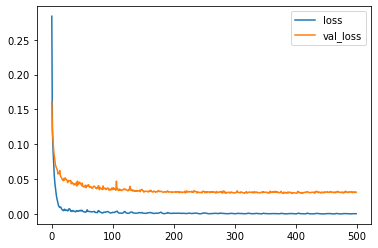

In [352]:
plt.figure(figsize =(12,10))
Loss_data.plot()
plt.show()

In [353]:
pred = model.predict(X_test)

Observation:
Error score decreased after increasing the trainign dataset, suggesting not enough training data were available to capture variance

In [354]:
mean_squared_error(y_test, pred)

0.03124511525310337

In [355]:
mean_absolute_error(y_test, pred)

0.10791812045028046

In [356]:
explained_variance_score(y_test, pred)

0.9682077104924482

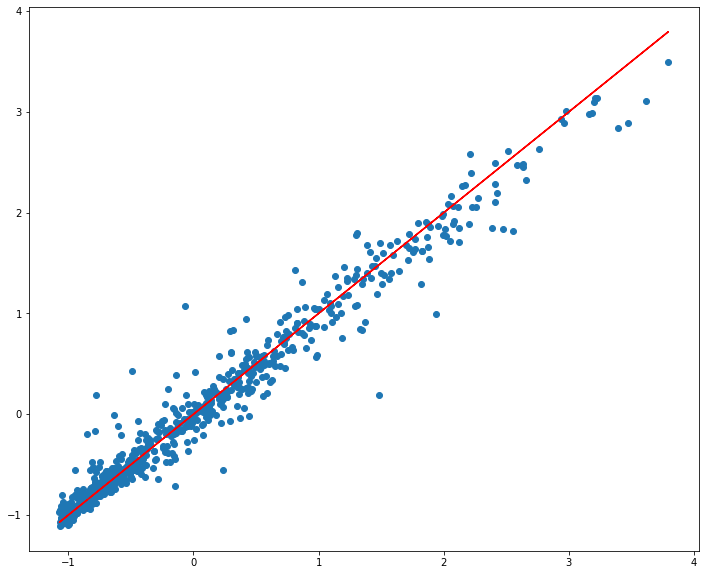

In [372]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test, 'r')

#### Removing Rainfall, Snowfall and Humidity since it shows least correlation to the Rented Bicycle Numbers to see how it affects the model

In [375]:
renewed_data = renewed_data.drop(columns="Rainfall(mm)")

In [376]:
renewed_data = renewed_data.drop(columns="Snowfall (cm)")


In [377]:
renewed_data = renewed_data.drop(columns="Humidity(%)")

In [378]:
renewed_data.shape

(7638, 88)

In [379]:
#Split training and test data.
X = renewed_data.values[:, 1:]
y = renewed_data.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#randomness needs to be added because of the discrepancy between the time zone

In [380]:
#Softmax for classification and linear for regression
model = Sequential() #Choosing Sequential over Functional API
model.add(Dense(200, input_dim=87, activation='relu')) #opting relu as an activation function over tanh and sigmoid
#Dropout?
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(200, input_dim=200, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 200)               17600     
_________________________________________________________________
dense_37 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_38 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 201       
Total params: 98,201
Trainable params: 98,201
Non-trainable params: 0
_________________________________________________________________


In [381]:

model.compile(optimizer = 'adam', loss = 'mse')

In [382]:
model.fit(X_train, y_train, epochs=500, batch_size=64,validation_data=(X_test, y_test))

Epoch 1/500
108/108 [==============================] - 0s 3ms/step - loss: 0.3279 - val_loss: 0.2056
Epoch 2/500
108/108 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1251
Epoch 3/500
108/108 [==============================] - 0s 2ms/step - loss: 0.1026 - val_loss: 0.1061
Epoch 4/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0777 - val_loss: 0.1011
Epoch 5/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0928
Epoch 6/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0463 - val_loss: 0.0859
Epoch 7/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0362 - val_loss: 0.0742
Epoch 8/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0313 - val_loss: 0.0733
Epoch 9/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.0722
Epoch 10/500
108/108 [==============================] - 0s 2ms/step - loss: 0.0226 - val_lo

<Figure size 792x792 with 0 Axes>

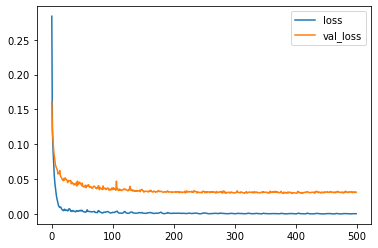

In [383]:
plt.figure(figsize =(11,11))
Loss_data.plot()
plt.show()

In [384]:
pred = model.predict(X_test)

In [385]:
mean_squared_error(y_test, pred)

0.03625542197235573

In [386]:
mean_absolute_error(y_test, pred)

0.11306966033599986

In [387]:
explained_variance_score(y_test, pred)

0.963178495423104

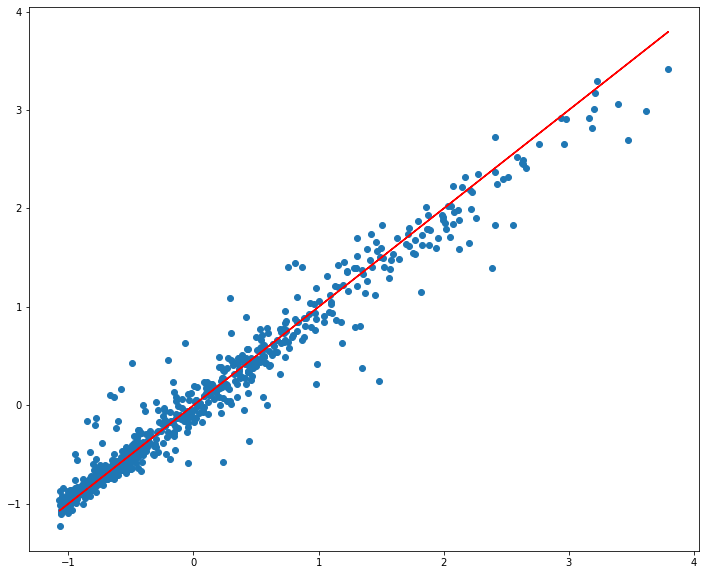

In [388]:
plt.figure(figsize=(10,12))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test, 'r')

The following output compared with the previous one shows that the output doesn't deteriorate with the model's performace after eliminating the variables.Infact it shows slightly better accuracy.This result goes in hand with hand with the correlation matrix that shows the the value of these three variables with that of the Rented Bike Count closer to 0.

Extras